In [ ]:
!pip uninstall -y opencv-python

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
!pip install opencv-python==3.4.2.17

     |████████████████████████████████| 25.0MB 133kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


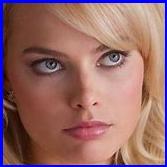

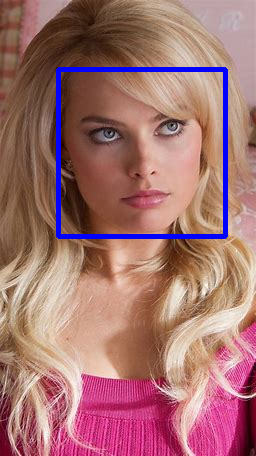

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# We point OpenCV's CascadeClassifier function to where our
# classifier (XML file format) is stored
face_classifier = cv2.CascadeClassifier('drive/MyDrive/XML_files/haarcascade_frontalface_default.xml')

# Load our image then convert it to grayscale
image = cv2.imread('drive/MyDrive/faces/barbi.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = face_classifier.detectMultiScale(gray, 1.1, 4)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
    print("No faces found")

# We iterate through our faces array and draw a rectangle
# over each face in faces
for (x,y,w,h) in faces:
  cv2.rectangle(image, (x, y), (x+w,y+h), (255,0,0), 3)
  faces = image[y:y + h, x:x + w]
  cv2_imshow(faces)
  # cv2.imwrite('face.jpg', faces)
  # cv2.waitKey(0)

# cv2.imwrite('detcted.jpg', image)
cv2_imshow(image)

# cv2.destroyAllWindows()

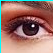

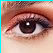

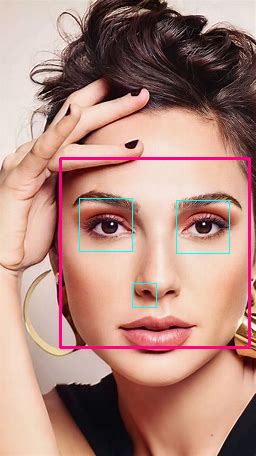

In [ ]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

face_classifier = cv2.CascadeClassifier('drive/MyDrive/XML_files/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('drive/MyDrive/XML_files/haarcascade_eye.xml')


img = cv2.imread('drive/MyDrive/faces/wonder_women.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_classifier.detectMultiScale(gray, 1.1, 10)

# When no faces detected, face_classifier returns and empty tuple
if faces is ():
  print("No Face Found")


for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(127,0,255),2) #
  # cv2_imshow(img)
  # cv2.waitKey(0) #
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_classifier.detectMultiScale(roi_gray)
  i = 0
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),0) #
    eyes = roi_color[ey:ey + eh, ex:ex + ew] #
    cv2_imshow(eyes)
    cv2.imwrite('eyes'+ str(i) +'.jpg', eyes)
    i = i + 1
    # cv2_imshow(img)
    # cv2.waitKey(0)

cv2_imshow(img)
# cv2.destroyAllWindows()

In [ ]:
from PIL import Image
from PIL import ImageChops

img1 = Image.open("eyes0.jpg")
img2 = Image.open("eyes1.jpg")

# diff = ImageChops.difference(img2, img1)

# diff.save("output.jpg")

# ImageChops.difference(img1, img2)

# Returns the absolute value of the pixel-by-pixel difference between the two images.

out = abs(img1 - img2)

# Return type: Image

TypeError: ignored

In [ ]:
!pip install PILLOW


In [ ]:
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2

datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2021-06-26 10:36:38--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  26.5MB/s    in 2.3s    

2021-06-26 10:36:41 (26.5 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



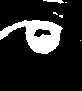

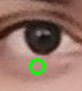

In [ ]:
import numpy as np
import cv2
import os
import dlib
from google.colab.patches import cv2_imshow

img = cv2.imread('left_eye1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Kernal = np.ones((3, 3), np.uint8)      #Declare kernal for morphology

ret, binary = cv2.threshold(gray, 60, 255, cv2.THRESH_BINARY_INV)
width, height = binary.shape
cv2_imshow(binary)
# binary = binary[int(0.4 * height):height, :]    ##Crop top 40%of the image
## To remove noises
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, Kernal)  ##Opening Morphology
dilate = cv2.morphologyEx(opening, cv2.MORPH_DILATE, Kernal)  ##Dilate Morphology

contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE,  ##Find contours
                                    cv2.CHAIN_APPROX_NONE)
if len(contours) != 0:
    cnt = contours[0]
    M1 = cv2.moments(cnt)

    Cx1 = int(M1['m10'] / M1['m00'])        ##Find center of the contour
    Cy1 = int(M1['m01'] / M1['m00'])
    croppedImagePixelLength = int(0.4*height)       ##Number of pixels we cropped from the image
    center1 = (int(Cx1), int(Cy1+croppedImagePixelLength))    ##Center coordinates
    cv2.circle(img, center1, 7, (0, 255, 0), 2)

cv2_imshow(img)

In [ ]:
import matplotlib.pyplot as plt
import cv2
import dlib
import numpy as np
# from irisSeg import find_iris
from google.colab.patches import cv2_imshow

# read, square crop and grayscale image of an eye
img = cv2.imread('00200.png')
# img = img[20:130, 20:130]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_ = plt.imshow(gray_img, cmap='gray')

# minimal iris radius -- 10px
# maximal iris radius -- 30px
answer = find_iris(gray_img, daugman_start=11, daugman_end=23, daugman_step=1, points_step=3)
# print(answer)

iris_center, iris_rad = answer
print("center = " + str(iris_center))
print("radius = " + str(iris_rad))
# plot result
out = img.copy()
cv2.circle(out, iris_center, iris_rad, (0, 0, 255), 1)
_ = plt.imshow(out[::,::,::-1])
cv2.imwrite('iris_trial.jpg', out)

# x = 55
# y = 43
# w = 2*iris_rad
# h = 2*iris_rad
# cv2.rectangle(out,(x,y),(x+w,y+h),(0,0,0),0) #
# iris = out[y:y + h, x:x + w] #
# cv2_imshow(iris)
# cv2.imwrite('right_iris.jpg', iris)

ImportError: ignored

In [ ]:
!pip install irisSeg

     |████████████████████████████████| 3.3MB 11.8MB/s 
     |████████████████████████████████| 3.0MB 51.0MB/s 
     |████████████████████████████████| 174kB 54.8MB/s 
     |████████████████████████████████| 29.2MB 104kB/s 
     |████████████████████████████████| 10.3MB 17.9MB/s 
     |████████████████████████████████| 51.0MB 54kB/s 
     |████████████████████████████████| 15.3MB 207kB/s 
     |████████████████████████████████| 27.4MB 111kB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
ERROR: ir

In [ ]:
## 2nd code to run

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read image.
img = cv2.imread('right_eye1.jpg')

# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, param2 = 30, minRadius = 1, maxRadius = 40)

if detected_circles is None:
  print("No circle Found")


# Draw circles that are detected.
if detected_circles is not None:

    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))

    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]

        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
        # cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        cv2_imshow(img)
        cv2.waitKey(0)

No circle Found


In [ ]:
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow

face_classifier = cv2.CascadeClassifier('drive/MyDrive/XML_files/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('drive/MyDrive/XML_files/haarcascade_eye.xml')

Kernal = np.ones((3, 3), np.uint8)

img = cv2.imread('left_eye1.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# output = img.copy()
# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1.3, 100)

faces = face_classifier.detectMultiScale(gray, 1.1, 4)

# When no faces detected, face_classifier returns and empty tuple
# if faces is ():
#   print("No Face Found")


for (x,y,w,h) in faces:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyes = eye_classifier.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
    eyes = roi_color[ey:ey + eh, ex:ex + ew]

    # cv2_imshow(eyes)
    # eye_gray = cv2.cvtColor(eyes, cv2.COLOR_BGR2GRAY)
    # circles = cv2.HoughCircles(eye_gray, cv2.HOUGH_GRADIENT, 1.3, 100)


# if circles is not None:
#   # Get the (x, y, r) as integers
#   circles = np.round(circles[0, :]).astype("int")
#   print(circles)
#   for (x, y, r) in circles:
#     cv2.circle(output, (x, y), r, (0, 255, 0), 2)
#     cv2_imshow(output)



eye1 = gray[y+ey:y+ey+eh, x+ex:x+ex+ew]
ret, binary = cv2.threshold(eye1, 60, 255, cv2.THRESH_BINARY_INV)
width, height = binary.shape
binary = binary[int(0.4 * height):height, :]
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, Kernal)  ##Opening Morphology
dilate = cv2.morphologyEx(opening, cv2.MORPH_DILATE, Kernal)  ##Dilate Morphology
contours, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE,  ##Find contours
                                    cv2.CHAIN_APPROX_NONE)
if len(contours) != 0:
    cnt = contours[0]
    M1 = cv2.moments(cnt)

    Cx1 = int(M1['m10'] / M1['m00'])        ##Find center of the contour
    Cy1 = int(M1['m01'] / M1['m00'])
    croppedImagePixelLength = int(0.4*height)       ##Number of pixels we cropped from the image
    center1 = (int(Cx1+x+ex), int(Cy1+y + ey + croppedImagePixelLength))    ##Center coordinates
    cv2.circle(img, center1, 15, (0, 255, 0), 2)

    # cv2_imshow(img)
    # cv2.waitKey(0)

cv2_imshow(img)
# cv2.destroyAllWindows()

AttributeError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Code for cropping left and right eye from face image






In [ ]:
import cv2
import numpy as np
import os
import dlib
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.pyplot as plt #
# from daugman import find_iris #

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("drive/MyDrive/shape_predictor_68_face_landmarks.dat")

# def midpoint(p1 ,p2):
#     return int((p1.x + p2.x)/2), int((p1.y + p2.y)/2)


img = cv2.imread('img.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

im = Image.open('img.jpg')

def midpoint(p1 ,p2): #
    return int((p1.x + p2.x)/2) #
###
#

      #
###

faces = detector(gray)
for face in faces:
  landmarks = predictor(gray, face)
  # center1 = midpoint(landmarks.part(36), landmarks.part(39)) #
  # center2 = midpoint(landmarks.part(42), landmarks.part(45)) #
  # rad = landmarks.part(39).x - landmarks.part(36).x #
  # eye = cv2.circle(img, center1, rad, (0, 0, 255), 2) #
  # cv2_imshow(eye) #
  # center_top_y1 = midpoint(landmarks.part(37), landmarks.part(38))
  # center_bottom_y1 = midpoint(landmarks.part(41), landmarks.part(40))
  center_x1 = midpoint(landmarks.part(37), landmarks.part(38))
  left11 = landmarks.part(36).x
  left21 = landmarks.part(36).y
  right11 = landmarks.part(39).x
  right21 = landmarks.part(39).y

  center_x2 = midpoint(landmarks.part(43), landmarks.part(44))
  left12 = landmarks.part(42).x
  left22 = landmarks.part(42).y
  right12 = landmarks.part(45).x
  right22 = landmarks.part(45).y
  # center_top_y2 = midpoint(landmarks.part(43), landmarks.part(44))
  # center_bottom_y2 = midpoint(landmarks.part(46), landmarks.part(47))
  # left2 = landmarks.part(42).x
  # right2 = landmarks.part(45).x

im_crop = im.crop((left11, (left21+(-center_x1+left11)), right11, (right21-(-center_x1+left11))))
im_crop.save('left_eye1.jpg', quality=95)

im_crop = im.crop((left12, (left22+(-center_x2+left12)), right12, (right22-(-center_x2+left12))))
im_crop.save('right_eye1.jpg', quality=95)

var1 = cv2.imread('left_eye1.jpg')
# cv2_imshow(var1)####
var2 = cv2.imread('right_eye1.jpg')
# cv2_imshow(var2)####
# print(var.shape)
# shape = np.shape(var) ##
# print(shape)##

height1, width1, b1 = var1.shape
h1 = int(height1/3)
w1 = int(width1/6)

height2, width2, b2 = var2.shape
h2 = int(height2/3)
w2 = int(width2/6)

#######

# # read, square crop and grayscale image of an eye
# img1 = cv2.imread('left_eye1.jpg')
# img2 = cv2.imread('right_eye1.jpg')
# # img = img[20:130, 20:130]
# gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# _ = plt.imshow(gray_img1, cmap='gray')
# _ = plt.imshow(gray_img2, cmap='gray')

# # minimal iris radius -- 10px
# # maximal iris radius -- 30px
# answer1 = find_iris(gray_img1, daugman_start=10, daugman_end=30, daugman_step=1, points_step=3)
# answer2 = find_iris(gray_img2, daugman_start=w2, daugman_end=h2, daugman_step=1, points_step=3)
# # print(answer)

# iris_center1, iris_rad1 = answer1
# iris_center2, iris_rad2 = answer2

# # print("center1 = " + str(iris_center1))####
# # print("radius1 = " + str(iris_rad1))#####
# # print("center2 = " + str(iris_center2))#####
# # print("radius2 = " + str(iris_rad2))#####
# # plot result
# # out1 = img1.copy()
# # out2 = img2.copy()

# # cv2.circle(out1, iris_center1, iris_rad1, (0, 0, 255), 1)
# # cv2.circle(out2, iris_center2, iris_rad2, (0, 0, 255), 1)

# # _ = plt.imshow(out1[::,::,::-1])
# # _ = plt.imshow(out2[::,::,::-1])

# # cv2.imwrite('left_iris.jpg', out1)
# # cv2.imwrite('right_iris.jpg', out2)

# # cv2_imshow(out1)
# # cv2_imshow(out2)

# ########

# for i in range(36, 41):
#     point1 = (landmarks.part(i).x, landmarks.part(i).y)     # --> (x, y)
#     point2 = (landmarks.part(i+1).x, landmarks.part(i+1).y)
#     hor_line = cv2.line(img, point1, point2, (0, 255, 0), 2)
#     # image = cv2.circle(img, (landmarks.part(i).x, landmarks.part(i).y), radius=1, color=(0, 255, 0), thickness=2) #

# point1 = (landmarks.part(36).x, landmarks.part(36).y)
# point2 = (landmarks.part(41).x, landmarks.part(41).y)
# hor_line = cv2.line(img, point1, point2, (0, 255, 0), 2)
#   # image = cv2.circle(img, (landmarks.part(41).x, landmarks.part(41).y), radius=1, color=(0, 255, 0), thickness=2) #

# for i in range(42, 47): #
#     point1 = (landmarks.part(i).x, landmarks.part(i).y)
#     point2 = (landmarks.part(i+1).x, landmarks.part(i+1).y)
#     hor_line = cv2.line(img, point1, point2, (0, 255, 0), 2)
#     # image = cv2.circle(img, (landmarks.part(i).x, landmarks.part(i).y), radius=1, color=(0, 255, 0), thickness=2) #

# point1 = (landmarks.part(42).x, landmarks.part(42).y)
# point2 = (landmarks.part(47).x, landmarks.part(47).y)
# hor_line = cv2.line(img, point1, point2, (0, 255, 0), 2)
#   # image = cv2.circle(img, (landmarks.part(47).x, landmarks.part(47).y), radius=1, color=(0, 255, 0), thickness=2) #

#   ### for complete face detection
#   # for i in range(0, 68):
#   #   image = cv2.circle(img, (landmarks.part(i).x, landmarks.part(i).y), radius=1, color=(0, 255, 0), thickness=2)


# cv2_imshow(img)
# cv2.imwrite('detected_face.jpg', img)
# key = cv2.waitKey(1)
# if key == 27:
#     break

# cap.release()
# cv2.destroyAllWindows()

Code for image resizing

In [ ]:
from PIL import Image

# Opens a image in RGB mode
imgL = Image.open("left3_gan.png")
imgR = Image.open("right3_gan.png")
# basewidth = 300 #fixing width
# wpercent = (basewidth / float(img.size[0]))  #calculating ratio
# hsize = int((float(img.size[1]) * float(wpercent)))  #changing height according to image and width
imgL = imgL.resize((81, 83), Image.ANTIALIAS)
imgL.save('resized_image_L.png')
imgR = imgR.resize((81, 83), Image.ANTIALIAS)
imgR.save('resized_image_R.png')

Code to compare two images

In [ ]:
from PIL import Image, ImageChops

img1 = Image.open('left_eye1.jpg')
img2 = Image.open('right_eye1.jpg')

diff = ImageChops.difference(img1, img2)

# print(diff.getbbox())
if diff.getbbox():
    diff.show()

**Main Code:** Compare two images and give us value


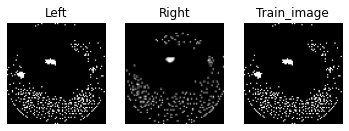

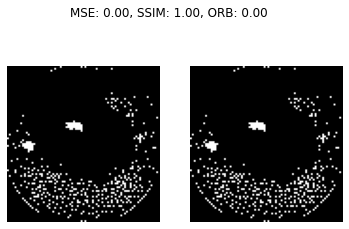

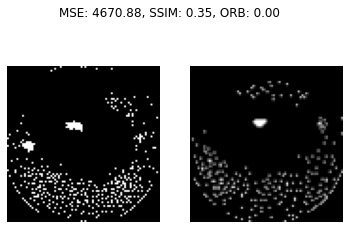

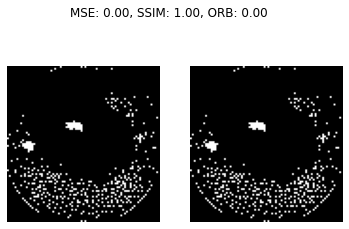

In [ ]:
# # # # from PIL import Image, ImageChops
# # #
# # # # from pixelmatch.contrib.PIL import pixelmatch
# # # import sys
# # #
# # # from scipy.misc import imread
# # # from scipy.linalg import norm
# # # from scipy import sum, average
# # #
# # #
# # # img_a = Image.open("star_trek1.jpg")
# # # img_b = Image.open("star_trek2.jpg")
# # # # img_diff = Image.new("RGBA", img_a.size)
# # # img_diff=ImageChops.difference(img_a,img_b)
# # # # width, height = 1920, 1080
# # # # img_a = [R1, G1, B1, A1, R2, B2, G2, A2, ...]
# # # # img_b = [R1, G1, B1, A1, R2, B2, G2, A2, ...]
# # #
# # # # data_diff = [0] * len(img_a)
# # #
# # # # note how there is no need to specify dimensions
# # # # mismatch = pixelmatch(img_a, img_b, img_diff, includeAA=True)
# # #
# # # # img_diff.save("diff.png")
# # #
# # # if img_diff.getbbox():
# # #     img_diff.show()
# #
# #
# from skimage.measure import structural_similarity as ssim
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage import measure
#s = ssim(imageA, imageB)


def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def orb_sim(img1, img2):
  # SIFT is no longer available in cv2 so using ORB
  orb = cv2.ORB_create()

  # detect keypoints and descriptors
  kp_a, desc_a = orb.detectAndCompute(img1, None)
  kp_b, desc_b = orb.detectAndCompute(img2, None)

  # define the bruteforce matcher object
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

  #perform matches.
  matches = bf.match(desc_a, desc_b)
  #Look for similar regions with distance < 50. Goes from 0 to 100 so pick a number between.
  similar_regions = [i for i in matches if i.distance < 50]
  if len(matches) == 0:
    return 0
  return len(similar_regions) / len(matches)


def compare_images(imageA, imageB, title):
    # compute the mean squared error and structural similarity
    # index for the images
    m = mse(imageA, imageB)
    s = ssim(imageA, imageB)
    o = orb_sim(imageA,imageB)
    # s = measure.compare_ssim(imageA, imageB)
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f, ORB: %.2f" % (m, s, o))
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap=plt.cm.gray)
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap=plt.cm.gray)
    plt.axis("off")
    # show the images
    plt.show()

# load the images -- the original, the original + contrast,
# and the original + photoshop
original = cv2.imread('resized_image_L.png')
contrast = cv2.imread("resized_image_R.png")
shopped = cv2.imread("resized_image_L.png")
# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)


fig = plt.figure("Images")
images = ("Left", original), ("Right", contrast), ("Train_image", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = 'gray')
	plt.axis("off")
# show the figure
# plt.imshow(eye, cmap='gray', interpolation='bicubic')
plt.show()

# compare the images
compare_images(original, original, "Left vs. Left")
compare_images(original, contrast, "Left vs. Right")
compare_images(original, shopped, "Left vs. Photoshopped")


# import numpy as np
# import cv2
# import PIL
# from PIL import Image
# from PIL import ImageDraw
# f1 = r'edit1.jpg'
# f2 = r'edit2.jpg'
# # data1 = Image.open(f1)
# data2 = Image.open(f2)
# data3 = data1.convert("L")
# data4 = data2.convert("L")
# raw1 = data3.getdata()
# raw2 = data4.getdata()
#
# #Subtracting pixels
# diff_pix = np.subtract(raw1,raw2)
#
# #Creating a new image with only the different pixels
# img_final = Image.new("L",(602,756))
# img_final.putdata(diff_pix)
#
# #Calculating box coordinates
# c=0
# for i in diff_pix:
#     if i > 25:
#         break
#     else:
#         c+=1
#
# x10 = c%602
# y10 = c//602
#
# #Drawing the box
# x1,y1,x2,y2 = x10-30, y10-20, x10+30, y10+20
# Drawer = ImageDraw.Draw(data2)
# Drawer.rectangle((x1, y1, x2, y2), outline="red", width=3)
#
# #Saving the image with box
# f3 = r'macfd3.bmp'
# data2.show()
# data2.save(f3)

In [ ]:
import cv2
import numpy as np
img = 'image8.png'
img.dtype
img=np.array(img)
gray = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2GRAY)
img1 = cv2.circle(gray,(256,256),63, (0,255,0), 8)

AttributeError: ignored

https://www.ijser.org/researchpaper/MSE-Vs-SSIM.pdf
MSE AND SSIM

Mean=0.668, Standard Deviation=0.099
Mean=0.408, Standard Deviation=0.174


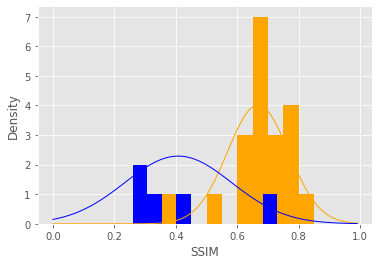

In [ ]:
from matplotlib import pyplot
import numpy as np
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm
# generate a sample
sample = (0.35,0.67,0.75,0.77,0.85,0.7,0.651,0.75,0.62,0.63,0.692,0.75,0.67,0.65,0.52,0.7,0.66,0.7,0.62,0.65)
# sample_gan= (0.73,0.44,0.26,0.35,0.260.25,0.4,0.45,0.37,0.31,0.3,0.3,0.28,0.39,0.3,0.4,0.26,0.2,0.19,0.4)
sample_gan= (0.26,0.26,0.35,0.44,0.73)
# calculate parameters
sample_mean = mean(sample)
sample_mean_gan = mean(sample_gan)
sample_std = std(sample)
sample_std_gan = std(sample_gan)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean_gan, sample_std_gan))
# define the distribution
dist = norm(sample_mean, sample_std)
dist_gan = norm(sample_mean_gan, sample_std_gan)
# sample probabilities for a range of outcomes
values = [value for value in np.arange(0.0,1.0,0.01)]
probabilities = [dist.pdf(value) for value in values]
probabilities_gan = [dist_gan.pdf(value) for value in values]
# plot the histogram and pdf
pyplot.xlabel('SSIM')
pyplot.ylabel('Density')
pyplot.hist(sample , color='orange')
pyplot.hist(sample_gan , color='blue')
pyplot.plot(values, probabilities, color='orange', label='Real',lw=1,clip_on=False)
pyplot.plot(values, probabilities_gan, color='blue', label='Fake',lw=1,clip_on=False)
pyplot.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

data_X, cls_lab = make_classification(n_samples=5, n_classes=2, weights=[1,1], random_state=1)
train_X, test_X, train_y, test_y = train_test_split(data_X, cls_lab, test_size=0.3, random_state=1)

model = RandomForestClassifier()
model.fit(trainX, trainy)



https://github.com/bnsreenu/python_for_microscopists/blob/master/144_145_binary_classification_ROC_AUC.py




No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.500


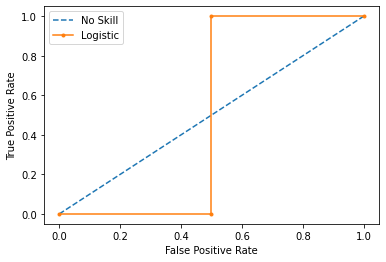

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=5, n_classes=2, random_state=0)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=0)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
# random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16,9)
%matplotlib inline

score = np.array([0.67,0.73,0.85,0.44,0.77,0.26,0.33,0.35,0.75,0.26,0.7,0.25,0.651,0.4,0.75,0.45,0.62,0.37,0.63,0.31,0.692,0.3,0.75,0.3,0.67,0.28,0.65,0.39,0.52,0.3,0.7,0.4,0.66,0.26,0.7,0.2,0.62,0.19,0.65,0.4])
y = np.array([1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0])

# false positive rate
FPR = []
# true positive rate
TPR = []
# Iterate thresholds from 0.0 to 1.0
thresholds = np.arange(0.0, 1.01, 0.2)
# array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

# get number of positive and negative examples in the dataset
P = sum(y)
N = len(y) - P

# iterate through all thresholds and determine fraction of true positives
# and false positives found at this threshold
for thresh in thresholds:
    FP=0
    TP=0
    thresh = round(thresh,2) #Limiting floats to two decimal points, or threshold 0.6 will be 0.6000000000000001 which gives FP=0
    for i in range(len(score)):
        if (score[i] >= thresh):
            if y[i] == 1:
                TP = TP + 1
            if y[i] == 0:
                FP = FP + 1
    FPR.append(FP/N)
    TPR.append(TP/P)

# FPR [1.0, 1.0, 0.5, 0.5, 0.0, 0.0]
# TPR [1.0, 1.0, 1.0, 0.5, 0.5, 0.0]

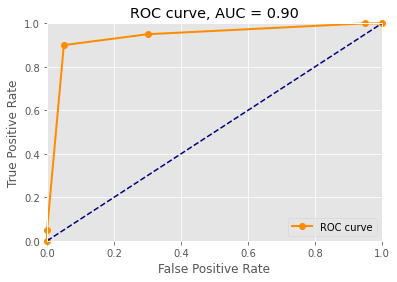

In [ ]:
auc = -1 * np.trapz(TPR, FPR) -(0.04)

plt.plot(FPR, TPR, marker='o', color='darkorange', lw = 2, label='ROC curve', clip_on=False)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = %.2f'%auc)
plt.legend(loc="lower right")
plt.savefig('AUC_example.png')
plt.show()